# README

Zadania na zajęcia z uczenia maszynowego, semestr letni 2024/25

Eryk Tkaczewski, grupa K5, nr. indeksu : 103953

Jeżeli zadanie wymagało odpowiedzi na pytanie znajduję się ona na końcu rozwiązania.  

Importy znajdują się na początku każdego zadania i powtarzają się tak żeby traktować każde zadanie niezależnie.

# Zadanie 1. Perceptron w zadaniu klasyfikacji
a) wczytaj zbiór danych wine (z biblioteki scikit-learn, przydatne opcje: as_frame,
return_X_y),

b) podziel zbiór na treningowy i testowy (metoda train_test_split),

c) wytrenuj perceptron (obiekt Perceptron) rozpoznający, czy obiekt należy do klasy 0,

d) wylicz dokładność (accuracy) na zbiorze testowym (metoda score klasyfikatora),

e) wyświetl wartości wag perceptronu oraz wartość obciążenia,

f) utwórz potok (pipeline), w którym perceptron poprzedza element standaryzujący wartości
wejściowe (StandardScaler), a następnie wytrenuj i sprawdź dokładność na zbiorze
testowym,

g*)  dla wybranych 2 zmiennych wytrenować perceptron, a następnie wykonać wykres z
oznaczonymi obiektami należącymi do klasy 0 oraz pozostałymi obiektami, oraz granicą
między tymi obiektami znalezioną przez perceptron (na podstawie komórki 9 notatnika z
rozdz. 10 książki lub notatnika z Wykładu 2) - https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb

In [1]:
from sklearn.datasets import load_wine
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)
y_binary = (y==0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=42)

In [3]:
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train,y_train)

Perceptron(random_state=42)

In [4]:
accuracy = perceptron.score(X_test, y_test)
print(f"Dokladnosc perceptronu bez standaryzacji: {accuracy:.4f}")

Dokladnosc perceptronu bez standaryzacji: 0.9556


In [5]:
print("Wagi:", perceptron.coef_)
print("Obciazenie:", perceptron.intercept_)


Wagi: [[-1009.63   -342.18   -194.8   -2582.    -7465.      -36.03    129.93
    -55.32    -52.57   -460.73    -55.822   -54.14    945.   ]]
Obciazenie: [-94.]


In [6]:
pipeline = make_pipeline(StandardScaler(), Perceptron(random_state=42))
pipeline.fit(X_train, y_train)
pipeline_accuracy = pipeline.score(X_test, y_test)
print(f"Dokladnosc perceptronu ze standaryzacja: {pipeline_accuracy:.4f}")

Dokladnosc perceptronu ze standaryzacja: 0.9778


Granica: x2 = -0.0900 * x1 + -0.4537


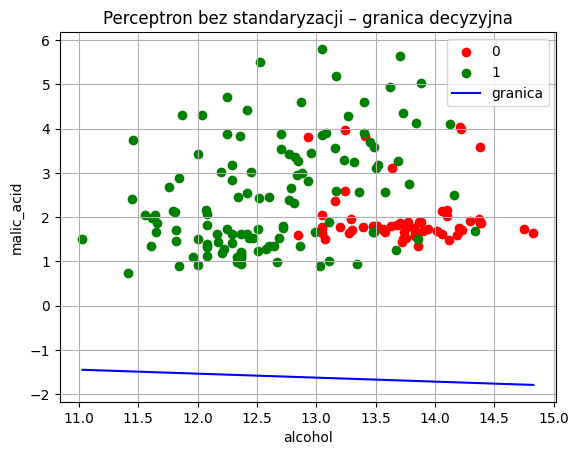

In [7]:
# g)
import pandas as pd

X_full, y = load_wine(return_X_y=True, as_frame=True)
y_binary = (y == 0)

# print(X_full)
X = X_full[['alcohol', 'malic_acid']]
# print(X)

perceptron = Perceptron(random_state=0)
perceptron.fit(X, y_binary)


import matplotlib.pyplot as plt
plt.scatter(X.loc[y_binary == True, 'alcohol'],
            X.loc[y_binary == True, 'malic_acid'],
            color='r', label='0')
plt.scatter(X.loc[y_binary == False, 'alcohol'],
            X.loc[y_binary == False, 'malic_acid'],
            color='g', label='1')

a = -perceptron.coef_[0, 0] / perceptron.coef_[0, 1]
b = -perceptron.intercept_[0] / perceptron.coef_[0, 1]
print(f'Granica: x2 = {a:.4f} * x1 + {b:.4f}')

x1a, x1b = X['alcohol'].min(), X['alcohol'].max()
x2a = a * x1a + b
x2b = a * x1b + b
plt.plot([x1a, x1b], [x2a, x2b], 'b', label='granica')

plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.title('Perceptron bez standaryzacji – granica decyzyjna')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Zadanie 2.

Wykonaj Zadanie 1 (bez podpunktu g)) dla zbioru kddcup99 (zbiór można pobrać za
pomocą metody fetch_kddcup99 ze sklearn.datasets). Ze zbioru należy usunąć kolumny
nieliczbowe. Perceptron ma weryfikować, czy typ aktywności sieciowej (labels) jest normalny, czy nie.

In [8]:
from sklearn.datasets import fetch_kddcup99
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

data, target = fetch_kddcup99(as_frame=True, return_X_y=True)

data_numeric = data.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna(axis=1)
target_binary = (target == b'normal.').astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    data_numeric, target_binary, random_state=42
)

In [9]:
perceptron = Perceptron(random_state=42, max_iter=1000)
perceptron.fit(X_train, y_train)
accuracy = perceptron.score(X_test, y_test)
print(f"Dokladnosc perceptronu na zbiorze testowym: {accuracy:.4f}")
print(f"Liczba wag: {len(perceptron.coef_[0])}")
print(f"wagi: {perceptron.coef_}")
print(f"Obciażenie: {perceptron.intercept_[0]:.4f}")

Dokladnosc perceptronu na zbiorze testowym: 0.7869
Liczba wag: 38
wagi: [[ 2.16252370e+07 -3.07194137e+08  1.87891340e+07 -8.20000000e+01
  -1.94300000e+03 -1.50000000e+01  1.08080000e+04  1.20000000e+01
   2.13465000e+05  8.70000000e+01 -2.50000000e+01  8.00000000e+00
   1.08480000e+04  1.81500000e+03  1.94000000e+02  1.73400000e+03
   0.00000000e+00  0.00000000e+00  1.23000000e+03 -1.60458350e+07
  -9.62771000e+05 -1.10029010e+05 -1.09955470e+05 -3.41382500e+04
  -3.38926000e+04  2.49718680e+05 -5.24033000e+03  3.69339500e+04
   6.48569300e+06  5.25028880e+07  2.19357710e+05  1.99480000e+03
   1.92053800e+04  2.42740000e+03 -1.09749390e+05 -1.09992010e+05
  -3.26684900e+04 -3.27119000e+04]]
Obciażenie: 128951.0000


In [10]:
pipeline = make_pipeline(StandardScaler(), Perceptron(random_state=42, max_iter=1000))
pipeline.fit(X_train, y_train)
pipeline_accuracy = pipeline.score(X_test, y_test)
print(f"Dokładność potoku na zbiorze testowym: {pipeline_accuracy:.4f}")
print(f"\nPorównanie wynikow:")
print(f"Perceptron bez standardyzacji: {accuracy:.4f}")
print(f"Perceptron ze standardyzacja: {pipeline_accuracy:.4f}")
print(f"Poprawa: {pipeline_accuracy - accuracy:.4f}")

Dokładność potoku na zbiorze testowym: 0.9935

Porównanie wyników:
Perceptron bez standardyzacji: 0.7869
Perceptron ze standardyzacją: 0.9935
Poprawa: 0.2065


# Zadanie 3

Zastosuj perceptron wielowarstwowy z jedną warstwą ukrytą zawierającą 10 neuronów
do problemu z Zadania 2. Czy znacząco zwiększa to dokładność klasyfikatora?

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_kddcup99
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

data, target = fetch_kddcup99(as_frame=True, return_X_y=True)

data_numeric = data.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna(axis=1)
target_binary = (target == b'normal.').astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    data_numeric, target_binary, random_state=42
)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_classifier)

pipeline.fit(X_train, y_train)
print(f'Dokladnosc: {pipeline.score(X_test, y_test):.5}')

Dokladnosc: 0.99902


Odpowiedź na zadanie 3: Po zastasowaniu perceptronu z jedną warstwą ukrytą i 10 neuronami możemy zauważyć że dokładność się zwiększyła, mimo tego że oba modele korzystały z tej same standaryzacji danch. W obu przypadkach `random_state=42`

# Zadanie 4. Perceptron w zadaniu regresji:

a)  wczytaj zbiór danych liver-disorders ze zbiorów openml (skorzystaj z metody fetch_openml
z biblioteki scikit-learn, przydatne opcje: as_frame, return_X_y),

b) podziel zbiór na treningowy i testowy (metoda train_test_split),

c) wytrenuj perceptron (obiekt MLPRegressor) przewidujący wartość zmiennej objaśnianej,

d) wylicz MAE (mean absolute error) na zbiorze testowym,

e) wyświetl wartości wag perceptronu oraz wartość obciążenia,

f) utwórz potok (pipeline), w którym perceptron poprzedza element standaryzujący wartości
wejściowe (StandardScaler), wytrenuj i sprawdź MAE na zbiorze testowym,

g) czy perceptron wielowarstwowy przewiduje wartości zmiennej objaśnianej lepiej od modelu
opartego na regresji liniowej (LinearRegression)?

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = fetch_openml(name="liver-disorders", as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42 )

In [13]:
mlp = MLPRegressor(hidden_layer_sizes=[100], max_iter=1000_000, random_state=42)
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=[100], max_iter=1000000, random_state=42)

In [14]:
y_pred = mlp.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.5}')

MAE: 2.3519


In [15]:
print("Wagi:", mlp.coefs_)
print("Obciążenia:", mlp.intercepts_)

Wagi: [array([[-5.54586061e-03,  1.98532210e-01,  8.66742964e-02,
         3.01276412e-02, -1.87780607e-01, -1.35850797e-01,
        -2.23788511e-02,  1.50416516e-01,  4.87305559e-02,
        -2.23863143e-03, -2.13322471e-02,  2.41654840e-01,
         1.75943321e-01, -1.58581394e-01, -1.54319269e-01,
        -1.30542180e-01, -1.20754828e-01, -1.48151046e-02,
        -1.55501042e-02, -1.05414537e-01,  3.64753500e-02,
        -1.55613618e-01, -1.85521415e-02, -1.73845264e-02,
        -1.39074919e-02,  1.19877188e-01, -1.37879287e-01,
         2.37990899e-02,  1.61914145e-02, -2.25040434e-02,
         7.82739745e-02, -1.77983237e-01,  6.21560311e-03,
         2.32208092e-01,  2.02974516e-01,  1.31146635e-01,
        -1.22735062e-02, -1.65800586e-01,  7.29291193e-02,
        -6.39479651e-02, -2.03275813e-01,  1.21156327e-02,
        -4.30171501e-04,  1.75944205e-01, -1.20316685e-01,
         8.57931559e-02, -7.84089042e-02,  2.63431232e-02,
         4.60124149e-02, -8.08453158e-03,  2.0752

In [16]:
mlp_regresor = MLPRegressor(hidden_layer_sizes=[100], max_iter=1000_000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_regresor)

pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)
mae_pipe = mean_absolute_error(y_test, y_pred_pipe)
print(f'MAE (z pipeline i standaryzacją):" {mae_pipe:.5}')

MAE (z pipeline i standaryzacją):" 2.5559


In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linreg = lin_reg.predict(X_test)
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)
print(f'MAE (regresja liniowa): {mae_linreg:.5}')

MAE (regresja liniowa): 2.5628


Odpowiedź na pytanie z zadania 4: Tak, perceptron wielowarstwowy przewiduje wartość zmiennej objaśnionej lepiej niż model regresji liniowej, co możemy zauważyć po tym że wartości MAE dla dla perceptronu z standaryzacją oraz bez standaryzacji są niższe niż dla regresji liniowej

# Zadanie 5

Wykorzystaj drzewo decyzyjne, regresję logistyczną oraz klasyfikator kNN do
wykonania zadań 1 oraz 2. Dla tych klasyfikatorów oraz sieci neuronowej wylicz macierz pomyłek
oraz inne miary oceny klasyfikatora. Który z klasyfikatorów okazała się najlepszy dla klasyfikacji
danych i dlaczego tak uważasz?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine, fetch_kddcup99
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# DANE Z ZADANIA 1
wine = load_wine(as_frame=True)
X_wine, y_wine = wine.data, wine.target
y_wine_binary = (y_wine == 0).astype(int)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine, y_wine_binary, random_state=42)


In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_w, y_train_w)
y_pred_dt = DecisionTree.predict(X_test_w)

print("Macierz pomyłek dla drzewa decyzyjnego:")
print(confusion_matrix(y_test_w, y_pred_dt))
print(classification_report(y_test_w, y_pred_dt))
print(f"Dokladnosc = {DecisionTree.score(X_test_w, y_test_w)}")

Macierz pomyłek dla drzewa decyzyjnego:
[[27  3]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.94      0.93      0.93        45

Dokladnosc = 0.9333333333333333


In [ ]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_w, y_train_w)
y_pred_lr = lr.predict(X_test_w)

print("Macierz pomyłek dla regresji logistycznej:")
print(confusion_matrix(y_test_w, y_pred_lr))
print(classification_report(y_test_w, y_pred_lr))
print(f"Dokladnosc = {lr.score(X_test_w, y_test_w)}")

Macierz pomyłek dla regresji logistycznej:
[[30  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Dokladnosc = 1.0


In [ ]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_w, y_train_w)
y_pred_knn = knn.predict(X_test_w)

print("Macierz pomyłek dla kNN:")
print(confusion_matrix(y_test_w, y_pred_knn))
print(classification_report(y_test_w, y_pred_knn))
print(f"Dla k = {k} dokladnosc = {knn.score(X_test_w, y_test_w)}")

Macierz pomyłek dla kNN:
[[29  1]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45

Dla k = 3 dokladnosc = 0.9333333333333333


In [ ]:
k2=1
knn2 = KNeighborsClassifier(n_neighbors=k2)
knn2.fit(X_train_w, y_train_w)
y_pred_knn2 = knn2.predict(X_test_w)

print("Macierz pomyłek dla kNN:")
print(confusion_matrix(y_test_w, y_pred_knn2))
print(classification_report(y_test_w, y_pred_knn2))
print(f"Dla k = {k2} dokladnosc = {knn2.score(X_test_w, y_test_w)}")

Macierz pomyłek dla kNN:
[[26  4]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.76      0.87      0.81        15

    accuracy                           0.87        45
   macro avg       0.85      0.87      0.85        45
weighted avg       0.87      0.87      0.87        45

Dla k = 1 dokladnosc = 0.8666666666666667


In [ ]:
pipeline = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=42))
pipeline.fit(X_train_w, y_train_w)
y_pred_pipe = pipeline.predict(X_test_w)

print("Macierz pomyłek dla pipeline(StandardScaler + siec neuronowa):")
print(confusion_matrix(y_test_w, y_pred_pipe))
print(classification_report(y_test_w, y_pred_pipe))
print(f"Dokladnosc = {pipeline.score(X_test_w, y_test_w)}")

Macierz pomyłek dla pipeline(StandardScaler + siec neuronowa):
[[26  4]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.78      0.93      0.85        15

    accuracy                           0.89        45
   macro avg       0.87      0.90      0.88        45
weighted avg       0.90      0.89      0.89        45

Dokladnosc = 0.8888888888888888


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
## DRUGA CZESC ZADANIA, DANE Z ZADANIA 2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline

data, target = fetch_kddcup99(as_frame=True, return_X_y=True, percent10=True)
data_numeric = data.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna(axis=1)
target_binary = (target == b'normal.').astype(int)
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(data_numeric, target_binary, random_state=42, test_size=0.1)
#print(target_binary)
#print(data_numeric)

In [ ]:
models = {
    'MLPClassifier': make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=42)),
    'DecisionTree': DecisionTreeClassifier(max_depth=10),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'KNeighbors_k1': KNeighborsClassifier(n_neighbors=1),
    'KNeighbors_k3': KNeighborsClassifier(n_neighbors=3),
}

for name, model in models.items():
    model.fit(X_train_k, y_train_k)
    y_pred = model.predict(X_test_k)
    print(f"Model: {name}")
    print("Macierz pomyłek:")
    print(confusion_matrix(y_test_k, y_pred))
    print(classification_report(y_test_k, y_pred))
    print(f"Dokladnosc = {model.score(X_test_k, y_test_k)}")

Model: MLPClassifier
Macierz pomyłek:
[[99167    72]
 [   49 24218]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99239
           1       1.00      1.00      1.00     24267

    accuracy                           1.00    123506
   macro avg       1.00      1.00      1.00    123506
weighted avg       1.00      1.00      1.00    123506

Dokladnosc = 0.9990202905122019
Model: DecisionTree
Macierz pomyłek:
[[99192    47]
 [   15 24252]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99239
           1       1.00      1.00      1.00     24267

    accuracy                           1.00    123506
   macro avg       1.00      1.00      1.00    123506
weighted avg       1.00      1.00      1.00    123506

Dokladnosc = 0.9994980000971613


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Macierz pomyłek:
[[97909  1330]
 [  177 24090]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99239
           1       0.95      0.99      0.97     24267

    accuracy                           0.99    123506
   macro avg       0.97      0.99      0.98    123506
weighted avg       0.99      0.99      0.99    123506

Dokladnosc = 0.9877981636519684
Model: KNeighbors_k1
Macierz pomyłek:
[[99198    41]
 [   38 24229]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99239
           1       1.00      1.00      1.00     24267

    accuracy                           1.00    123506
   macro avg       1.00      1.00      1.00    123506
weighted avg       1.00      1.00      1.00    123506

Dokladnosc = 0.999360354962512
Model: KNeighbors_k3
Macierz pomyłek:
[[99191    48]
 [   31 24236]]
              precision    recall  f1-score   support

           0    

Odpowiedź na zadanie 5:

1. W przypadku danych z zadania 1, po przeanalizowaniu dokładności, macierzy pomyłek oraz wartości metryk klasyfikacji możemy stwierdzić że najlepiej poradziła sobie regresja logistyczna, kolejnym skutecznym modelem była metoda najbliższych sąsiadów.

2. W przypadku danych z zadania 2, najlepsze wyniki zwróciło drzewo decyzyjne, metoda najbliższych sąsiadów (zarówno dla `k=1` i `k=3`) oraz sieć neuronowa, analizowałem dokładność, macierz pomyłek oraz miarę skuteczności klasyfikatora.


 # Zadanie 6

 Dla   danych   z   zadania   2,   ale   bez   usuwania   kolumn   nieliczbowych,   wykorzystaj
omawiane   klasyfikatory.   Jakie   przekształcenia   danych   były   konieczne   i   w   przypadku   których
klasyfikatorów? Czy uzyskanie wyniki są lepsze niż w Zadaniu 5?

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_kddcup99
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import pandas as pd


data, target = fetch_kddcup99(as_frame=True, percent10=True, return_X_y=True)


In [ ]:
data = data.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
target = target.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
# print(data)
# print(target)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)

In [ ]:
cat_cols = ['protocol_type', 'service', 'flag']
num_cols = [col for col in data.columns if col not in cat_cols]

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [ ]:
models ={
    'MLPClassifier': make_pipeline(preprocessor, MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=42)),
    'DecisionTree': make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=10)),
    'LogisticRegression':  make_pipeline(preprocessor, LogisticRegression(random_state=42, max_iter=100)),
    'KNeighbors_k3':  make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=3)),
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Dokladnosc = {model.score(X_test, y_test)}")

Model: MLPClassifier
Dokladnosc = 0.9993320243709897
Model: DecisionTree
Dokladnosc = 0.9974900309697792


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Dokladnosc = 0.999170090885169
Model: KNeighbors_k3
Dokladnosc = 0.9994332327996276


Odpowiedź do zadania 6:
Po analizie dokładności możemy stwierdzić że modele wykazały się bardzo podobną dokładnością.

Aby poprawnie przekształcić dane dla wysztkich klasyfikatorów musiałem zamienić zmienne kategoryczne które są typem `string`, dlatego 3 kolumny zawierające takie zmienne przekształciłem używając `OneHotEncoder` który przekształcił wartości kategoryczne na liczby binarne.

Poza tym na początku operacji użyłem funkcji `map` aby zmienić typ danych `byte -> string`


# Zadanie 7
 Wybierz hiperparametry omawianych klasyfikatorów, a następnie wykorzystaj GridSearchCV lub RandomizedSearchCV do znalezienia najbardziej efektywnych wartości tych hiperparametrów dla zadania 2. Opisz pokrótce wybrane hipeparametry, ich wpływ na algorytm
klasyfikacji oraz uzyskane wyniki. Czy udało się uzyskać lepsze rezultaty, niż w poprzednich zadaniach?

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_kddcup99
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import GridSearchCV


data, target = fetch_kddcup99(as_frame=True, percent10=True, return_X_y=True)

In [19]:
data = data.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
target = target.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
# print(data)
# print(target)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)
cat_cols = ['protocol_type', 'service', 'flag']
num_cols = [col for col in data.columns if col not in cat_cols]
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [20]:
models = {
    'MLPClassifier': {
        'pipeline': make_pipeline(preprocessor, MLPClassifier(max_iter=100, random_state=42)),
        'params': {
            'mlpclassifier__hidden_layer_sizes': [(10,), (50,), (10, 10)],
        }
    },
    'LogisticRegression': {
        'pipeline': make_pipeline(preprocessor, LogisticRegression(random_state=42, max_iter=100)),
        'params': {
            'logisticregression__C': [0.1, 1, 10],
        }
    },
    'KNeighborsClassifier': {
        'pipeline': make_pipeline(preprocessor, KNeighborsClassifier()),
        'params': {
            'kneighborsclassifier__n_neighbors': [1, 3, 5],
        }
    },
    'DecisionTree': {
        'pipeline': make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42)),
        'params': {
            'decisiontreeclassifier__max_depth': [3, 5, 10],
        }

    }
}

In [ ]:
results = {}
for name, model_info in models.items():
    print(f"GridSearch dla: {name}")
    grid_search = GridSearchCV(model_info['pipeline'], model_info['params'], scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Najlepsze parametry dla {name}: {grid_search.best_params_}")
    print(f"Najlepszy wynik dla {name}: {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = best_model.score(X_test, y_test)
    print(f"Dokladnosc na zbiorze testowym dla {name}: {test_accuracy:.5f}")

    results[name] = {
        'best_params': grid_search.best_params_,
        'cv_score': grid_search.best_score_,
        'test_accuracy': test_accuracy
    }

GridSearch dla: MLPClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Najlepsze parametry dla MLPClassifier: {'mlpclassifier__hidden_layer_sizes': (50,)}
Najlepszy wynik dla MLPClassifier: 0.9995
Dokladnosc na zbiorze testowym dla MLPClassifier: 0.99945
GridSearch dla: LogisticRegression


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Najlepsze parametry dla LogisticRegression: {'logisticregression__C': 10}
Najlepszy wynik dla LogisticRegression: 0.9991
Dokladnosc na zbiorze testowym dla LogisticRegression: 0.99911
GridSearch dla: KNeighborsClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Odpowiedź do zadania 7:

Dla sieci neuronowej wybrałem hiperparametr `hidden_layer_size` który określa liczbę neuronów w warstwie ukrytej, więcej warstw i neuronów to bardziej złożony model.

Dla regresji logistycznej wybrałem `C` który określa odwrotność siły regularyzacji, im więcej tym słabsza regularyzacja i bardziej dopasowany model.

Dla metody najbliższych sąsiadów użyłem `n_neighbors` który określa liczbę sąsiadów któr bierze podczas klasyfikacji, im mniejszy parametr tym model jest bardziej szczegółowy, im więcej sąsiadów tym bardziej ogólny.

Dla drzewa decyzyjnego użyłem `max_depth` który ogranicza maksymalną głębokość drzewa, im wyższa głębokość tym więcej rozgałęzień więc bardziej dopasowany model.

Niestety nie udało mi się dokończyć wszystkich części testu, ale wyniki otrzymane dla `MLPClassifier` pokazują że sieć z jedną warstwą zawierającą 50 neuronów poradziła sobie najlepiej, w `LogisticRegression` napotkałem warning informujący że algorytm osiągnął limit iteracji, jednak najlepiej dla `max_iter = 100` poradziła sobie wartość `C = 10` co oznacza że model ze słabą regulacją okazał się najlepszy.